In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_curve, roc_auc_score

In [2]:
df=pd.read_csv('bankloans.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [3]:
df.shape

(850, 9)

In [4]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [8]:
df.nunique()

age          37
ed            5
employ       33
address      32
income      129
debtinc     245
creddebt    842
othdebt     848
default       2
dtype: int64

In [9]:
for column in df.columns:
    print("{}: {}%".format(column, np.round(df[column].isnull().sum()/len(df[column])*100,2)))

age: 0.0%
ed: 0.0%
employ: 0.0%
address: 0.0%
income: 0.0%
debtinc: 0.0%
creddebt: 0.0%
othdebt: 0.0%
default: 17.65%


In [10]:
df['default'].value_counts()

default
0.0    517
1.0    183
Name: count, dtype: int64

In [11]:
df['default'].isna().sum()

150

In [12]:
df=df.dropna()
df.shape

(700, 9)

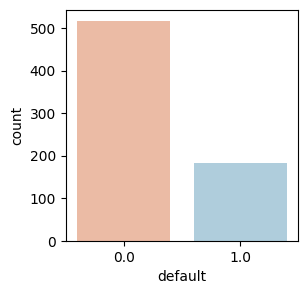

In [13]:
plt.figure(figsize=(3, 3)) 
sns.countplot(x='default', data=df, palette=sns.color_palette("RdBu", n_colors=2), legend=False, hue='default') 
plt.show()

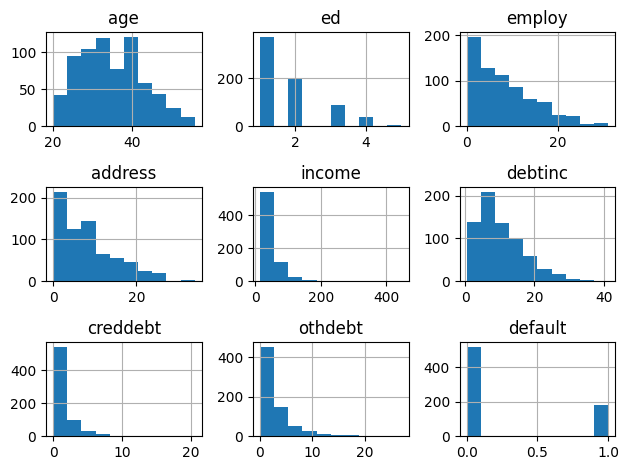

In [14]:
df.hist()
plt.tight_layout()

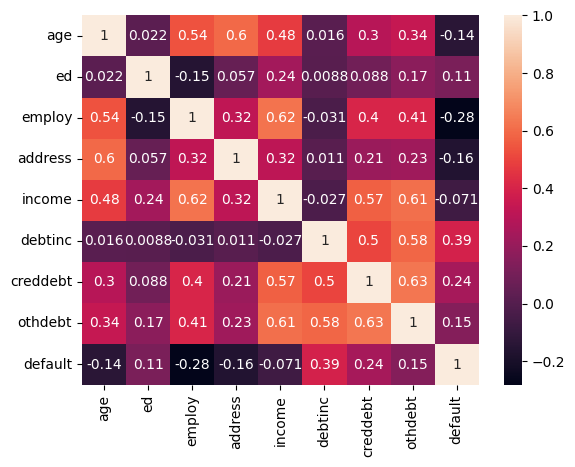

In [35]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [16]:
# Separate features and target variable
X = df.drop(columns=['default'])
y = df['default']

In [17]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

<IPython.core.display.Javascript object>

In [19]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model

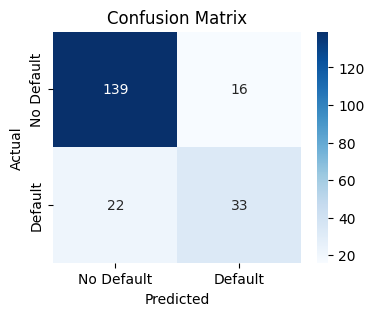

In [30]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [22]:
# 2. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       155
         1.0       0.67      0.60      0.63        55

    accuracy                           0.82       210
   macro avg       0.77      0.75      0.76       210
weighted avg       0.81      0.82      0.82       210



In [23]:
# 3. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


In [24]:
# 4. Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

Precision: 0.67


In [25]:
# 6. F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

F1-Score: 0.63


In [26]:
# 7. ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.84


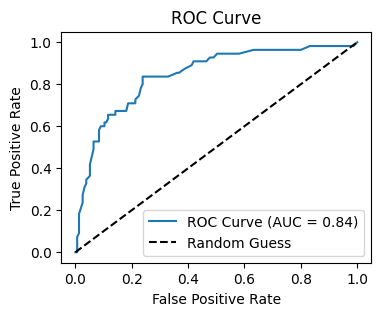

In [27]:
# 8. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

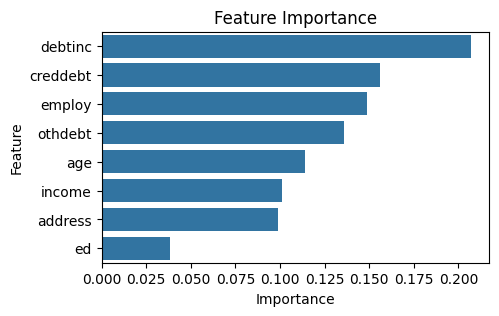

In [29]:
# Optional: Feature Importance
importances = model.feature_importances_
feature_names = df.drop(columns=['default']).columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(5,3))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()